# 2. Exercise solutions

# Exericse 1

*No solution.*

# Exercise 2

In [1]:
# utils.py
import numpy as np


def extract_interval(x, x_bounds):
    '''Return the indices that are inside an interval.
    
    Parameters
    ----------
    x : 1D numpy array
        x-coordinates sorted in ascending order.
    x_bounds : tuple
        A two-element tuple defining the interval within which to extract x-indices.
        Both boundary values are inclusive.
        
    Returns
    -------
    numpy 1D array
        Array of indices for `x`-values that reside within `x_bounds`.
         
    Assumptions
    ------------
    The function assumes that the input array `x` is sorted in ascending order.
    '''

    # Create boolean array with values indicating if each element is in interval
    a_bool = (x >= x_bounds[0]) & (x <= x_bounds[1])
    
    # Extract indices where condition is True into array
    idx = np.where(a_bool)
    
    # Take first element since this is only 1D and return
    return idx[0]

In [2]:
# Code below will only run if executed as script, not if imported
if __name__ == '__main__':
    
    # Basic tests
    x1 = np.arange(0, 10)
    idx1 = extract_interval(x=x1, x_bounds=(3, 7))
    print(f'x1 = {x1}')
    print(f'idx1 = {idx1}')

    x2 = np.arange(-0.6, 3.8, 0.4)
    idx2 = extract_interval(x=x2, x_bounds=(-0.3, 1.5))
    print('\n')
    print(f'x2 = {x2}')
    print(f'idx2 = {idx2}')

x1 = [0 1 2 3 4 5 6 7 8 9]
idx1 = [3 4 5 6 7]


x2 = [-0.6 -0.2  0.2  0.6  1.   1.4  1.8  2.2  2.6  3.   3.4]
idx2 = [1 2 3 4 5]


# Exercise 3

In [3]:
# utils.py (continued)
def extrema_indices(y):
    ''' Return indices of all local extrema in `y`. 
    
    Parameters
    ----------
    y : 1D numpy array
        Array of values to search for local extrema.
        
    Returns
    -------
    1D numpy array
        Array of indices for local extrema.
    '''
    # Find local maxima
    idx_max, _ = find_peaks(y)
    
    # Find local minima
    idx_min, _ = find_peaks(-y)
    
    # Combine the two index arrays to one array and return it
    return np.append(idx_max, idx_min)

In [4]:
# Code below will only run if executed as script, not if imported
if __name__ == '__main__':
    
    # Test the function
    from scipy.signal import find_peaks

    xx = np.linspace(1, 20, 40)
    yy = np.sin(xx) * 3 * np.cos(xx**2)

    idx_extr = extrema_indices(yy)

    print(yy[idx_extr])

[ 1.83936866  2.00743698  1.76511072  2.68372999 -0.10032392  1.99429972
  0.27309389  2.23407394  0.12795831  2.51053515  0.2974298  -2.00646398
 -0.63018205 -2.36255017 -2.42571128 -0.65672365 -0.37642334 -2.60571339
 -1.05772914 -1.4625172  -0.7508744  -2.34019749 -1.50602509]


### Note

The third-party function `find_peaks` from `scipy.signal` was **not** imported before the function was defined. It is only needed at the time the function is called and the code has to be executed. The `def func_name` only *defined* the code to be executed later.

# Exercise 4

In [5]:
# utils.py (continued)
def arrays_todict(x_arr, y_arr):
    ''' 
    Return a dictionary with y-values in string form as keys 
    and x- and y-values as values. 
    
    Parameters
    ----------
    x_arr : 1D numpy array
        Array of x-values
    y_arr : 1D numpy array
        Array of y-values
        
    Returns
    -------
    dict
        Dictionary of the form 
        {'y1': (x1, y1), 'y2': (x2, y2), ..., 'yn': (xn, yn)}
    '''
    return {f'{y:.2f}': (x, y) for x, y in zip(x_arr, y_arr)}

In [6]:
# Code below will only run if executed as script, not if imported
if __name__ == '__main__':
    # Basic test run         
    extreme_dict = arrays_todict(xx[idx_extr], yy[idx_extr])
    print(extreme_dict)

{'1.84': (2.4615384615384617, 1.8393686554620106), '2.01': (3.923076923076923, 2.007436980439802), '1.77': (5.384615384615384, 1.76511071804143), '2.68': (8.307692307692307, 2.6837299913341677), '-0.10': (9.282051282051281, -0.10032391707156325), '1.99': (10.743589743589743, 1.9942997236478899), '0.27': (12.205128205128204, 0.2730938867590919), '2.23': (14.153846153846153, 2.23407394156468), '0.13': (16.102564102564102, 0.1279583056638538), '2.51': (17.076923076923077, 2.5105351527604087), '0.30': (18.538461538461537, 0.2974298010204702), '-2.01': (1.9743589743589745, -2.0064639778358577), '-0.63': (3.4358974358974357, -0.6301820520525064), '-2.36': (4.410256410256411, -2.3625501688331543), '-2.43': (7.333333333333333, -2.42571128215708), '-0.66': (8.794871794871796, -0.6567236452070268), '-0.38': (9.769230769230768, -0.37642334136110583), '-2.61': (11.23076923076923, -2.60571339261865), '-1.06': (13.179487179487179, -1.0577291429854063), '-1.46': (15.128205128205128, -1.46251720044265

# Exercise 5

In [7]:
# plotting.py
def annotate_points(points_to_annotate, ax, **kwargs):
    '''
    Annotate points with corresponding text.
    
    Parameters
    ----------
    points_to_annoate : dict
        Dictionary with desired annotation text as keys and the (x, y)-
        coordinates of the annotation as values.
    ax : matplotlib axis object
        Axis object on which to plot the annotations. 
    **kwargs : keyword arguments
        Arguments to be forwarded to the ax.annotate call.    
    '''
    
    # Loop through x- and y-coordinates of all points
    for text, (xp, yp) in points_to_annotate.items():

        # Annotate point
        ax.annotate(s=text, xy=(xp, yp), **kwargs)

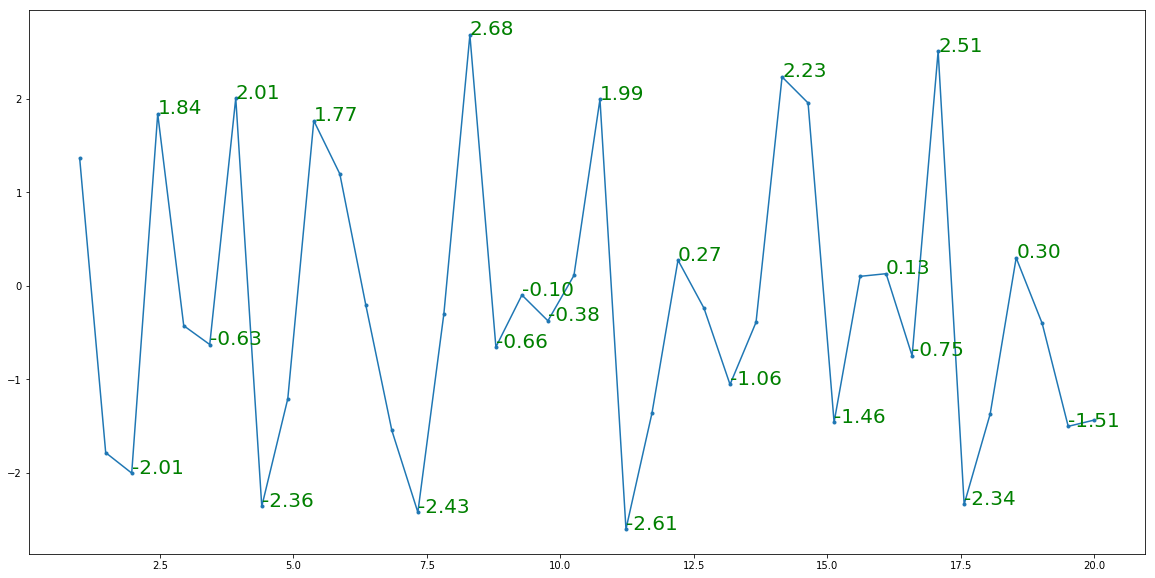

In [8]:
# Code below will only run if executed as script, not if imported
if __name__ == '__main__':
    
    # Testing if it works
    import matplotlib.pyplot as plt

    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(20,10))

    # Plot line graph
    ax.plot(xx, yy, '.-')

    # Annotate peaks
    annotate_points(extreme_dict, ax, color='green', size=20)

    plt.show()

### Note

The object oriented API for Matplotlib was used for this plot. It might as well have been done by the simpler but less flexible `plt` API, which resembles Matlab's syntax. Here the commands would be

---
```python
# Plot line graph
plt.plot(xx, yy)

# Loop through x- and y-coordiantes of all peaks
for xp, yp in zip(xx[idx_extr], yy[idx_extr]):
    # Annotate peak
    plt.annotate(s=f'{yp:.2f}', xy=(xp, yp))
```
---

It is not necessary to create a figure object with the simple API, as it's taken care of in the background. It would be needed in case the figure object should be used directly in the code, e.g. for saving to a file.

You might wonder why the simple API was not used for the solution. The answer is that the object oriented API has much more customizability, which is e.g. often seen for subplots where `ax` will be an array of axes representing each subplot. Therefore it's good to get in the habit of working with the axes as objects. Working with objects like this is very common in Python.

See here for more about the two different API's: https://matplotlib.org/3.1.1/api/index.html

# Exercise 6

The code in the cell below is an example of how `main.py` could look after having solves Exercise 6. 

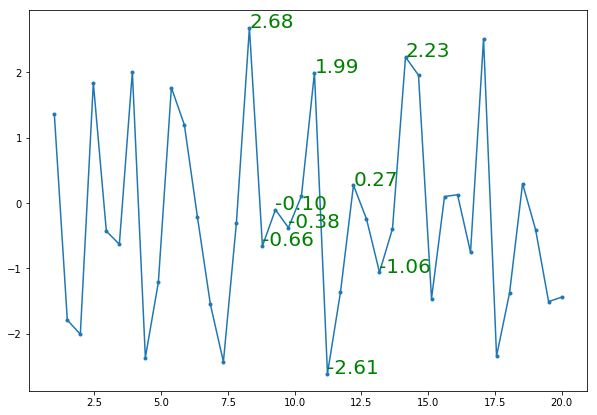

In [9]:
# main.py

# Third party imports
import matplotlib.pyplot as plt
import numpy as np

# Project specific imports
import utils
import plotting

# Create a graph
x = np.linspace(1, 20, 40)
y = np.sin(x) * 3 * np.cos(x**2)

# Define the interval in which to annotate extreme values
interval = (7, 15)

# Extract indices for values inside interval
interval_idx = utils.extract_interval(x, interval)

# Extract only values inside interval for both arrays
xx = x[interval_idx]
yy = y[interval_idx]

# Find indices of the extreme values in the interval
idx_extr = utils.extrema_indices(yy)

# Create a dict of x- and y-coords for extreme values using the found indices 
extreme_dict = utils.arrays_todict(xx[idx_extr], yy[idx_extr])

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 7))

# Plot original line graph (entire graph)
ax.plot(x, y, '.-')

# Annotate peaks inside the defined interval
plotting.annotate_points(extreme_dict, ax, color='green', size=20)

plt.show()

Note that even though the local minimum at ~7.5 is inside the interval (7, 15), it is not getting annotated. This is because after we have extracted the interval, it is not a local maximum, but simply the first point in the series.

See the plot of the extracted interval below. 

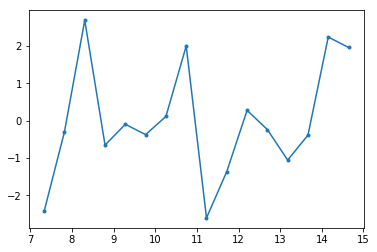

In [10]:
plt.plot(xx, yy, '.-')
plt.show()

We would have to write some additional code to catch this, if it was needed for the use case.

# Some improvements

### Extracting multiple intervals
We can alter the function `extract_intervals` we created earlier to accept any number of intervals in the form of tuples.

Implementing this functionality cn be done by use of *args (or *x_bounds if you like). We should then rename the function to extract_intervals (with added 's').

An implementation with `*args` is often preferred compared to inputting a list of tuples. It is especially noticeable when calling the function with only a single interval, which is probably most common. Compare the two calls below:

---
```python
# Function call with single interval when implementation is done by *args
extract_intervals(x, (4, 8))

# Function call with single interval when implementation is done by list of tuples
extract_intervals(x, [(4, 8)])
```
---

The altered function is shown below.

In [11]:
def extract_intervals(x, *x_bounds):
    ''' Return the indices values in y that are within the range x_bounds.

    As many intervals as desired can be given.

    Parameters
    ----------
    x : 1D numpy array
        x-coordinates sorted in ascending order.
    *x_bounds : tuple(s)
        Two-element tuple(s) defining the interval(s) within which to
        extract x-indices. Both boundary values in each tuple are inclusive.

    Returns
    -------
    numpy 1D array
        Array of indices for `x`-values that reside within `x_bounds`.

    Assumptions
    ------------
    The function assumes that the input array `x` is sorted in ascending order.
    '''

    # Create list of boolean arrays for each interval (mask arrays)
    mask = [(x >= xb[0]) & (x <= xb[1]) for xb in x_bounds]

    # Overlay boolean arrays, keep 'True' at an index if it is in any array
    s = mask[0] if len(mask) == 1 else np.logical_or.reduce(mask)

    # Extract idx in intervals by fancy indexing (extract where cond is True)
    idx = np.where(s)

    return idx[0]

In [12]:
if __name__ == '__main__':

    # Test with a single interval
    x = np.array([ -5.2, -3.7, -1.4, 1.4,  3.5, 4.2, 8.2, 10.4, 12.0])
    idx = extract_intervals(x, (-2.0, 1.9))
    print(f'idx with a single interval = {idx}')

    # Test with two intervals
    x = np.array([ -5.2, -3.7, -1.4, 1.4, 3.5, 4.2, 8.2, 10.4, 12.0])
    idx = extract_intervals(x, (-2.0, 1.9), (4.1, 11.3))
    print(f'idx with two intervals = {idx}')

idx with a single interval = [2 3]
idx with two intervals = [2 3 5 6 7]


Note that `numpy.reduce` was used. The documentation can be found [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html).

### Number of decimal points for annotations
The function `arrays_to_dict` above will always round the annotations to two decimals. However, we could instead have that set as the default and let the user overwrite it with a specified number of decimal points.

The altered function is presented below.

In [13]:
def arrays_todict(x_arr, y_arr, key_decimals=2):
    ''' 
    Return a dictionary with y-values in string form as keys 
    and x- and y-values as values. 
    
    Parameters
    ----------
    x_arr : 1D numpy array
        Array of x-values
    y_arr : 1D numpy array
        Array of y-values
        
    Returns
    -------
    dict
        Dictionary of the form 
        {'y1': (x1, y1), 'y2': (x2, y2), ..., 'yn': (xn, yn)}
    '''
    return {f'{y:.{key_decimals}f}': (x, y) for x, y in zip(x_arr, y_arr)}

In [14]:
# Run the function with only 1 decimal points instead
if __name__ == '__main__':
    # Basic test run         
    extreme_dict = arrays_todict(xx[idx_extr], yy[idx_extr], key_decimals=1)
    print(extreme_dict)

{'2.7': (8.307692307692307, 2.6837299913341677), '-0.1': (9.282051282051281, -0.10032391707156325), '2.0': (10.743589743589743, 1.9942997236478899), '0.3': (12.205128205128204, 0.2730938867590919), '2.2': (14.153846153846153, 2.23407394156468), '-0.7': (8.794871794871796, -0.6567236452070268), '-0.4': (9.769230769230768, -0.37642334136110583), '-2.6': (11.23076923076923, -2.60571339261865), '-1.1': (13.179487179487179, -1.0577291429854063)}


The keys now have 1 decimal instead of 2.

# End of exercises

*The cell below is for setting the style of this document. It's not part of the exercises.*

In [15]:
# Apply css theme to notebook
from IPython.display import HTML
HTML('<style>{}</style>'.format(open('../css/cowi.css').read()))